# Part I - (Ford GoBike System Data Analysis)
## by (Solomon Chikwendu)

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
# Read the data into a pandas DataFrame
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [5]:
# Structure of the dataset
df.shape

(183412, 16)

In [6]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

Looking at the statistics above, the difference between std and mean on the `duration_sec` column shows that there are outliers.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

<p>
There are 183412 rides in the dataset with 16 features. Most of the variables are numerics in nature, but their ordering are not significant except for `duration_sec`.
</p> 

### What is/are the main feature(s) of interest in your dataset?

<p>
I'm most interested in figuring out the days of the week with the highest ride
</p>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

<p>
I expect that the location of the start station will have a strong effect on the number of rides.
</p>

## Data Wrangling

In [8]:
# Convert start_time, end_time to datetime
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [10]:
# Drop missing values
df.dropna(inplace=True)

In [11]:
# Check for duplicate rows
df.duplicated().sum()

0

In [12]:
# Extract year, month, day and hour from start time and end time
df['start_year'] = df.start_time.dt.year
df['start_month'] = df.start_time.dt.month
df['start_day'] = df.start_time.dt.day_of_week
df['start_hour'] = df.start_time.dt.hour
df['end_year'] = df.end_time.dt.year
df['end_month'] = df.end_time.dt.month
df['end_day'] = df.end_time.dt.day_of_week
df['end_hour'] = df.end_time.dt.hour

## Univariate Exploration

### Duration

How is the duration distributed across all rides?

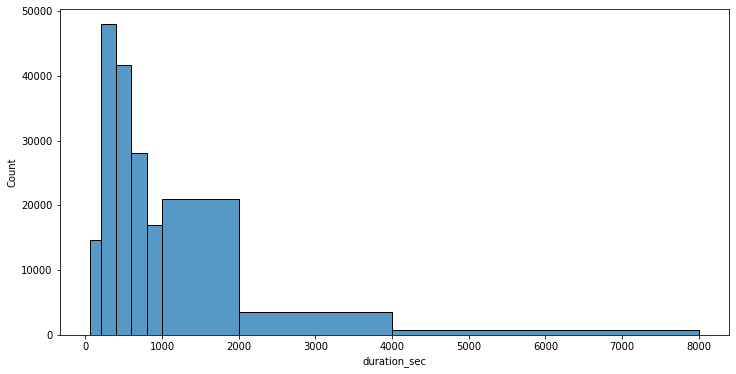

In [13]:
plt.figure(figsize=[12, 6])
bin = np.arange(60, df.duration_sec.max()+ 1000, 1000)
sb.histplot(data=df, x=df.duration_sec, bins=[60, 200, 400, 600, 800, 1000, 2000, 4000, 8000]);

It appears that most of the rides are between the 200-400 seconds duration 

### Top Start Stations

Which stations do rides originates from the most?

In [14]:
top_start_station = df.start_station_name.value_counts().head(10)
top_start_station

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

We can visualize this information using a bar chart

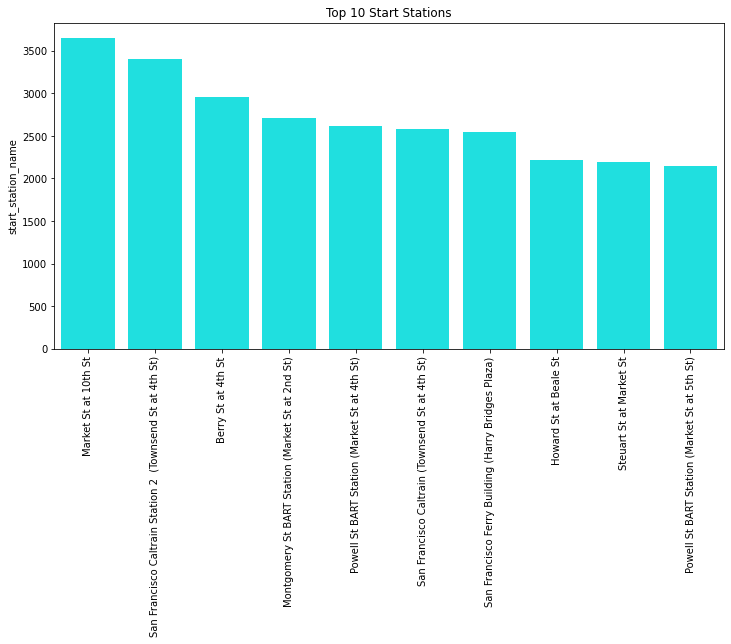

In [15]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Start Stations')
sb.barplot(x=top_start_station.index, y=top_start_station, color=(0,1,1));

Market St at 10th St has the highest number of rides originating from it's station.

### Least Start Stations

Which stations do rides originates from the least?

In [16]:
least_start_station = df.start_station_name.value_counts().tail(10)
least_start_station

23rd Ave at Foothill Blvd                17
Backesto Park (Jackson St at 13th St)    17
Leavenworth St at Broadway               16
Taylor St at 9th St                      13
Willow St at Vine St                      9
Farnam St at Fruitvale Ave                9
Parker Ave at McAllister St               7
21st Ave at International Blvd            4
Palm St at Willow St                      3
16th St Depot                             2
Name: start_station_name, dtype: int64

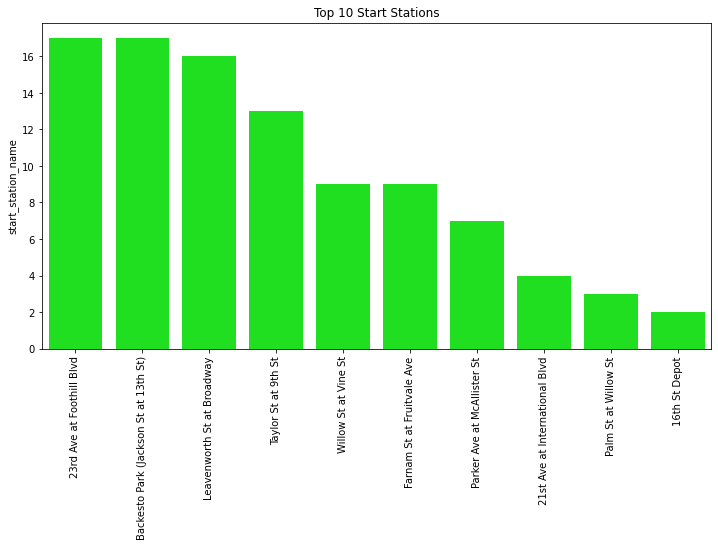

In [17]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Start Stations')
sb.barplot(x=least_start_station.index, y=least_start_station, color=(0,1,0));

Looking at the visualizations, it appears that the number of rides starting from  the individual stations are not evenly distributed. The top stations have thousands of rides that started from their stations while the bottom stations have below twenty rides that started from their stations.

### Top Destination Stations

Which stations are the top destination stations?

In [18]:
top_end_station = df.end_station_name.value_counts().head(10)
top_end_station

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

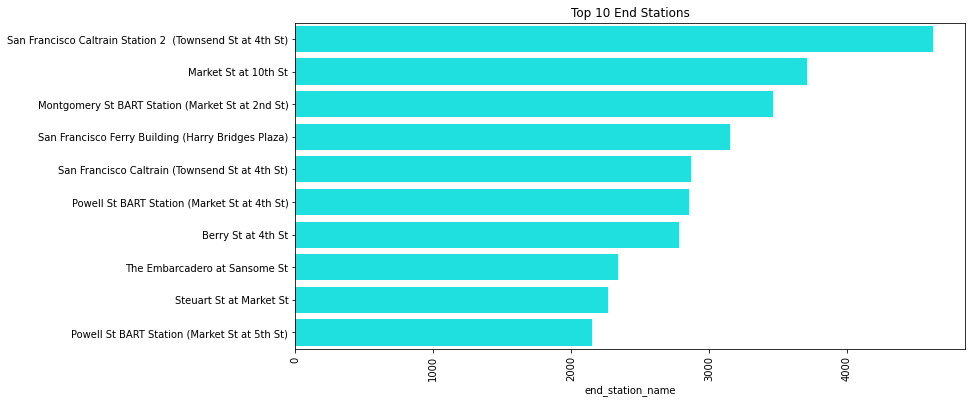

In [45]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 End Stations')
sb.barplot(y=top_end_station.index, x=top_end_station, color=(0,1,1));

The San Francisco Caltrain Station 2 (Townsend St at 4th St) station has the highest arrival

### Least Destination Stations

In [20]:
least_end_station = df.end_station_name.value_counts().tail(10)
least_end_station

Backesto Park (Jackson St at 13th St)    18
Foothill Blvd at Harrington Ave          16
Leavenworth St at Broadway               12
Taylor St at 9th St                      11
Farnam St at Fruitvale Ave               10
Parker Ave at McAllister St               9
Palm St at Willow St                      7
16th St Depot                             6
Willow St at Vine St                      5
21st Ave at International Blvd            5
Name: end_station_name, dtype: int64

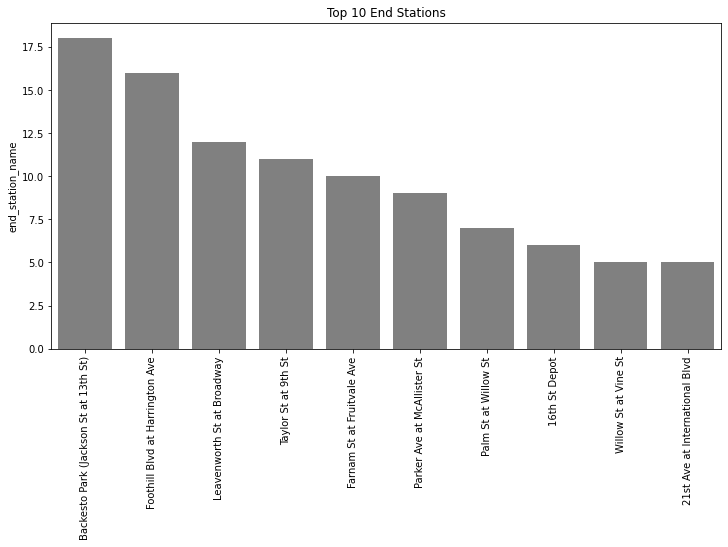

In [44]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 End Stations')
sb.barplot(x=least_end_station.index, y=least_end_station, color='grey');

Backesto Park (Jackson St at 13th St) has the least arrival

### User Type

Which type of users has the highest rides?

In [21]:
import plotly.express as px

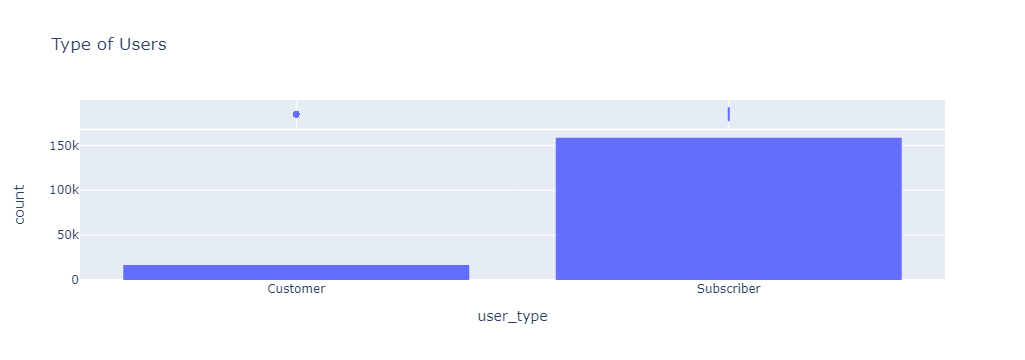

In [22]:
px.histogram(df, x='user_type', marginal='box', title='Type of Users')

It appears that a large percentage of the users are subscribers

### Gender

Which gender has the most rides?

In [23]:
gender_counts = df.member_gender.value_counts()
gender_counts

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

A pie chart would be a great way to visualize the distribution.

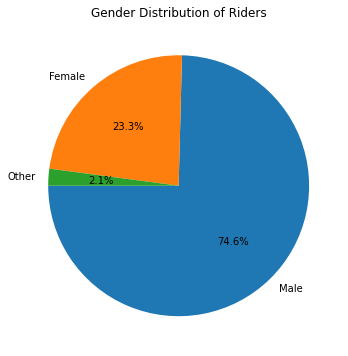

In [46]:
fig = plt.figure(figsize=[12, 6])
fig.set_facecolor('white')
plt.title('Gender Distribution of Riders')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 23% of the riders identify as female. 74% of the riders are male.

### Start Day

What day of the week does the business record the highest rides?

In [25]:
df.start_day.unique()

array([3, 2, 1, 0, 6, 5, 4], dtype=int64)

In [26]:
# Let's replace the numbers with their actual day of week
df.start_day.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)
df.end_day.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

In [27]:
start_days = df.start_day.value_counts()
start_days

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

We can visualize this information using a bar chart

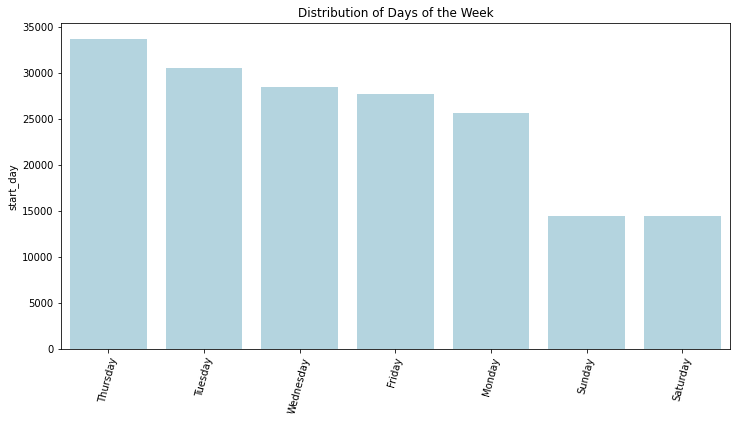

In [28]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Distribution of Days of the Week')
sb.barplot(x=start_days.index, y=start_days, color='lightblue');

It appears that rides are high on weekdays compared to weekends. Thursday has the highest ride while Saturday has the least

### Start Month

Let's take a look at the month in the data

In [29]:
df.start_month.unique()

array([2], dtype=int64)

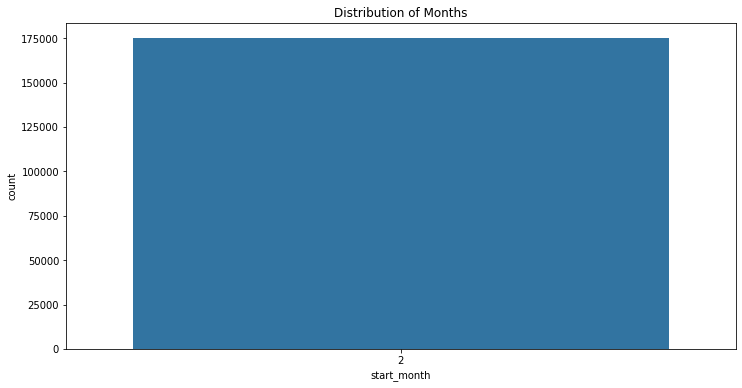

In [30]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Months')
sb.countplot(data=df, x='start_month');

It appears all the rides were in February

### Start Hour

What time of the day do people mostly use bikes?

In [31]:
start_hour = df.start_hour.value_counts()
start_hour

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start_hour, dtype: int64

We can visualize this information using a bar chat

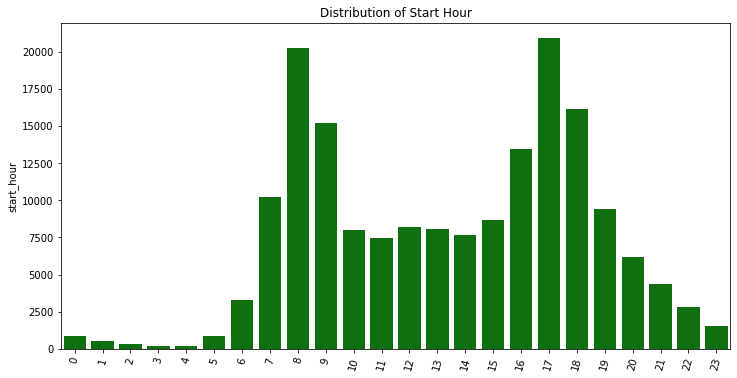

In [32]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Distribution of Start Hour')
sb.barplot(x=start_hour.index, y=start_hour, color='green');

The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be linked to the rush hours where people are leaving for work and come later in the evening.

### Bike Share for all Trip

In [33]:
bike_share_df = df.bike_share_for_all_trip.value_counts()
bike_share_df

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

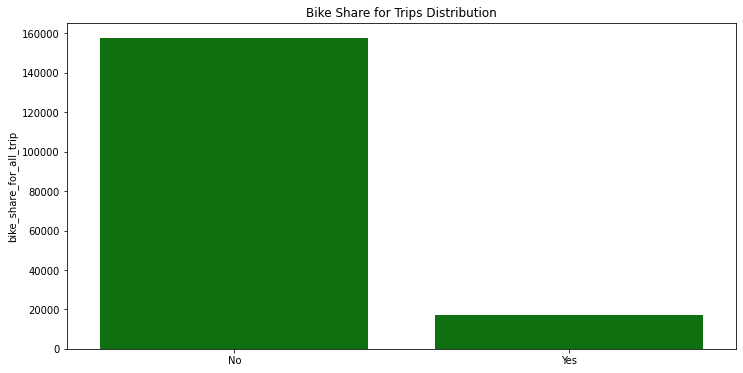

In [34]:
plt.figure(figsize=(12,6))
plt.title('Bike Share for Trips Distribution')
sb.barplot(x=bike_share_df.index, y=bike_share_df, color='green');

We can deduce from the chart above that bike sharing is not available for all

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

<p>
I looked at how the variation of trips changes with respect to Datetime and customer type. The main focus was on hours of the day, days of the week, gender and customer type
</p>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

<p>
Before the analysis, I expected Monday to have the highest number of rides being the first day of a new week, instead it has the least ride for weekdays.
</p>

<p>
I changed the datatype of `start time` and `end time` from object to datetime. This willenable me extract the `day`, `month` and `day of the week` from the dataset 
</p>

<p>
I splitted the datetime column into `year`, `month`, `day of the week` for easy analysis.
</p>

## Bivariate Exploration

### Ride Duration vs Day of Week

Which day of the week has the highest and lowest average duration?

In [35]:
# Convert start days to categorical data
df['start_day'] = pd.Categorical(df.start_day, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

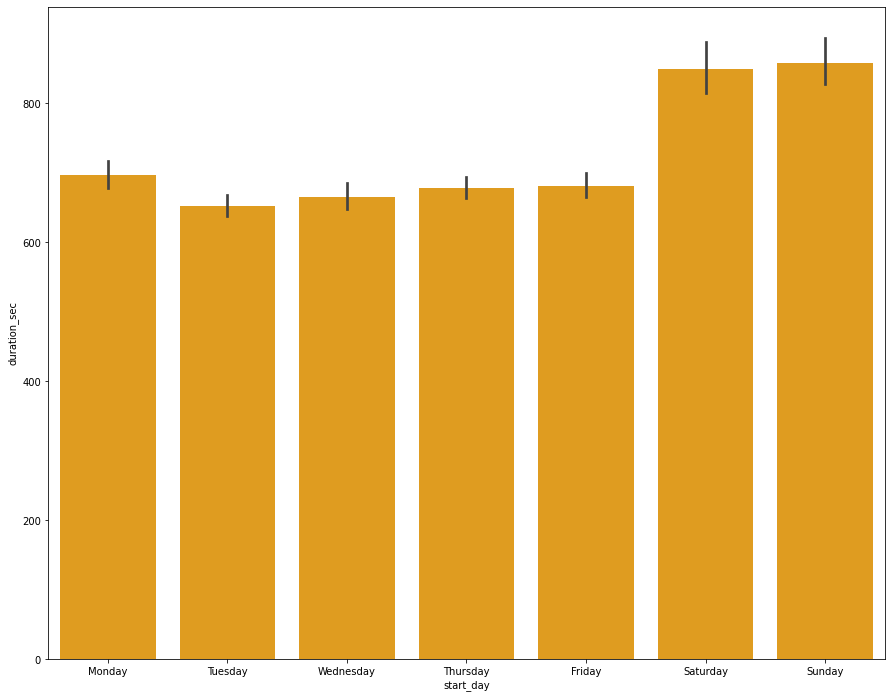

In [36]:
plt.figure(figsize=[15, 12])
sb.barplot(x='start_day', y='duration_sec', data=df, color='orange');

Weekend (Sunday) trips take longer as compared to trips taken during the week. Tuesday on the the other hand has the least average duration for trips

### Gender vs. Duration

Which gender has the lowest ride duration?

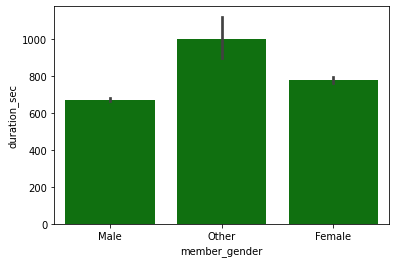

In [37]:
sb.barplot(x='member_gender', y='duration_sec', data=df, color='green');

From the visualization, the average duration for male is smaller compared to females and other gender.The line cutting each bar represents the amount of variation in the values.The variation in duration is relatively higher for `Other` and lower for `Male`and `Female` 

### Duration vs User Type

Which user type has the least duration?

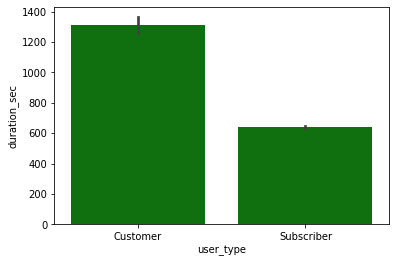

In [38]:
sb.barplot(x='user_type', y='duration_sec', data=df, color='green');

Subscriber user type trips take a shorter duration than customer user type

### User Type vs Bike Sharing for Trips 

How is user type and bike sharing distributed?

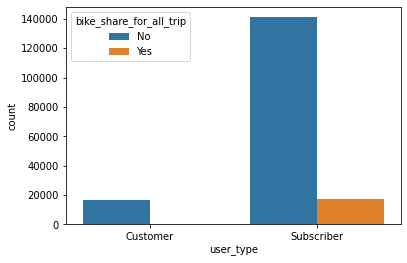

In [39]:
sb.countplot(x='user_type', data=df, hue='bike_share_for_all_trip');

It appears that bike sharing is only available to subscribers 

### Start Day vs User Type

Does the day have an effect on the type of users?

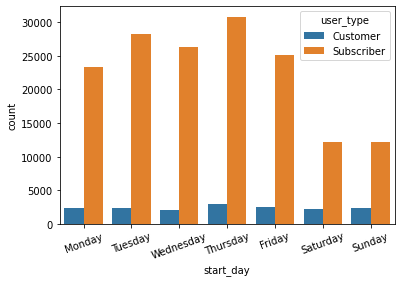

In [40]:
plt.xticks(rotation=20)
sb.countplot(x='start_day', data=df, hue='user_type');

Customer type does not really affect the number of trips in any given week day

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

<p>
It can be seen that longer trips are made during weekends compared to weekdays
</p>

<p>
Also the average duration to complete a trip is smaller for male
</p>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


<p>
Yes, It appears that bike sharing is only available to subscribers and not customers
</p>

## Multivariate Exploration

<p>
Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.
</p>

### Start day vs Duration vs User Type

Which day has the least average duration in terms of the user type?

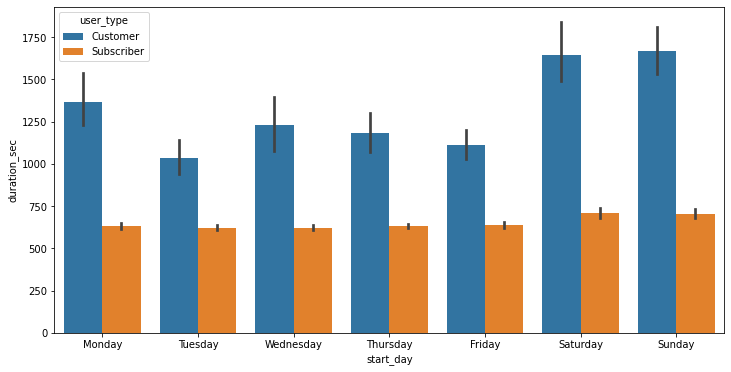

In [41]:
plt.figure(figsize=[12, 6])
sb.barplot(x='start_day', y='duration_sec', hue='user_type', data=df);

Customers travel long distance regardless the day of the week(longest on weekends) whereas subscribers generally travel short distance with litle increase on weekends but not up to that of the customers.

### Start Day vs Duration vs Gender

Let's visualize the data to see if there are days where the duration is longer for male

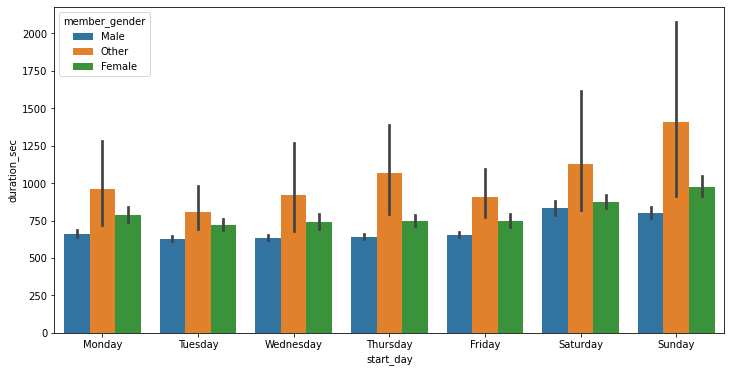

In [42]:
plt.figure(figsize=[12,6])
sb.barplot(x='start_day', y='duration_sec', hue='member_gender', data=df);

The chart above shows that irrespective of the day, it takes lesser time for male compared to female and other gender

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<p> 
The duration of bike usage by males on weekdays varies slightly, indicating that there may be a consistent group of individuals using the bike system every day.
</p>

## Conclusions
+ There is a huge difference in the number of rides across some locations. This may be attributed to factors such as traffic conditions or population size in those areas.

+ Only about 23% of the riders identify as female. 74% of the riders are male.

+ It appears that rides are high on weekdays compared to weekends. Thursday has the highest ride while Saturday has the least

+ The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be linked to the rush hours where people are leaving for work and come later in the evening.

+ Weekend trips take longer as compared to trips taken during the week

+ The average ride duration for male is smaller compared to females and other gender.The line cutting each bar represents the amount of variation in the values.The variation in duration is relatively higher for `Other` and lower for `Male`and `Female` 
